In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
DATA_PATH = "C:/Users/ash/Desktop/0503 Dust Sensor"
def load_csv_data(file_name):
    csv_path = os.path.join(DATA_PATH, file_name)
    return pd.read_csv(csv_path)

datas = []
for i in range(5):
    datas.append(load_csv_data("sensor" + str(i + 1) + ".csv"))

datas[0].head()

,time,IP,raw_std,raw_cali,smooth_std,smooth_cali,cf_1_0,cf_2_5,cf_10_0,at_1_0,at_2_5,at_10_0,num_0_3,num_0_5,num_1_0,num_2_5,num_5_0,num_10_0
0,2021-05-03 17:20,192.168.0.10,-54,6,-77,-12,20,22,32,23,24,32,649,170,14,1,0,0
1,2021-05-03 17:20,192.168.0.10,-75,-11,-79,-14,20,22,32,23,24,32,646,173,15,1,0,0
2,2021-05-03 17:20,192.168.0.10,-75,-11,-79,-14,19,22,32,22,24,32,639,171,15,1,0,0
3,2021-05-03 17:20,192.168.0.10,-92,-25,-79,-14,19,22,32,22,24,32,629,169,15,1,0,0
4,2021-05-03 17:20,192.168.0.10,-67,-4,-79,-14,19,22,32,22,24,32,616,168,15,1,0,0


In [80]:
valid_datas = datas
for i in range(5):
    row = datas[i][datas[i]['at_10_0'] < 0].index
    valid_datas[i] = datas[i].drop(row)
    valid_datas[i] = valid_datas[i].reset_index(drop=True)

valid_datas[0]

,time,IP,raw_std,raw_cali,smooth_std,smooth_cali,cf_1_0,cf_2_5,cf_10_0,at_1_0,at_2_5,at_10_0,num_0_3,num_0_5,num_1_0,num_2_5,num_5_0,num_10_0
0,2021-05-03 17:20,192.168.0.10,-54,6,-77,-12,20,22,32,23,24,32,649,170,14,1,0,0
1,2021-05-03 17:20,192.168.0.10,-75,-11,-79,-14,20,22,32,23,24,32,646,173,15,1,0,0
2,2021-05-03 17:20,192.168.0.10,-75,-11,-79,-14,19,22,32,22,24,32,639,171,15,1,0,0
3,2021-05-03 17:20,192.168.0.10,-92,-25,-79,-14,19,22,32,22,24,32,629,169,15,1,0,0
4,2021-05-03 17:20,192.168.0.10,-67,-4,-79,-14,19,22,32,22,24,32,616,168,15,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14881,2021-05-03 23:54,192.168.0.10,-84,-18,-89,-22,3,4,5,5,7,9,198,39,4,1,1,1
14882,2021-05-03 23:54,192.168.0.10,-101,-33,-89,-22,3,4,5,5,7,9,196,39,4,1,1,1
14883,2021-05-03 23:54,192.168.0.10,-95,-28,-88,-22,3,4,5,5,7,9,194,38,4,1,1,1
14884,2021-05-03 23:54,192.168.0.10,-91,-24,-88,-22,3,4,5,5,7,9,196,39,4,1,1,1


<AxesSubplot:xlabel='time', ylabel='raw_cali'>

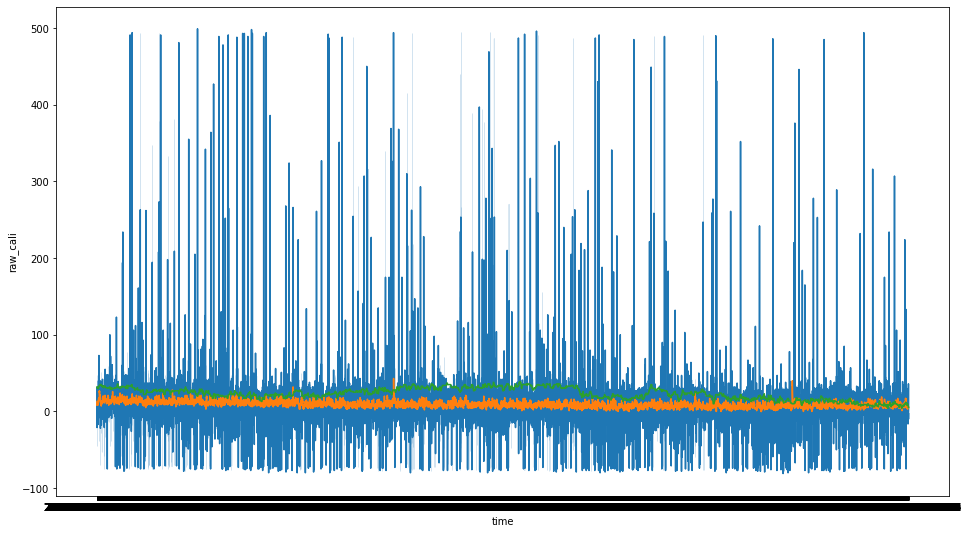

In [145]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=valid_datas[2]['raw_cali'], x=valid_datas[2]['time'])
sns.lineplot(y=valid_datas[2]['smooth_cali'], x=valid_datas[2]['time'])
sns.lineplot(y=valid_datas[2]['at_10_0'], x=valid_datas[2]['time'])


In [61]:
from sklearn.preprocessing import MinMaxScaler

scale_cols = ['raw_std', 'at_10_0']
# scaled_datas = MinMaxScaler().fit_transform(valid_datas[0][scale_cols])
# scaled_datas = pd.DataFrame(scaled_datas)
# scaled_datas.columns = scale_cols

time_datas = valid_datas[0][['time']]
timefloat_datas = time_datas
timefloat_datas['TimeFloat'] = (pd.DatetimeIndex(time_datas['time']).astype(np.int64) // 10 ** 9 - 50000) % 86400

timefloat_datas = pd.DataFrame(timefloat_datas['TimeFloat'])

timefloat_datas = pd.concat([timefloat_datas, valid_datas[0][scale_cols]], axis=1)
timefloat_datas


<ipython-input-61-931248e3c3d9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timefloat_datas['TimeFloat'] = (pd.DatetimeIndex(time_datas['time']).astype(np.int64) // 10 ** 9 - 50000) % 86400


,TimeFloat,raw_std,at_10_0
0,12400,-54,32
1,12400,-75,32
2,12400,-75,32
3,12400,-92,32
4,12400,-67,32
...,...,...,...
14881,36040,-84,9
14882,36040,-101,9
14883,36040,-95,9
14884,36040,-91,9


<AxesSubplot:xlabel='TimeFloat', ylabel='raw_std'>

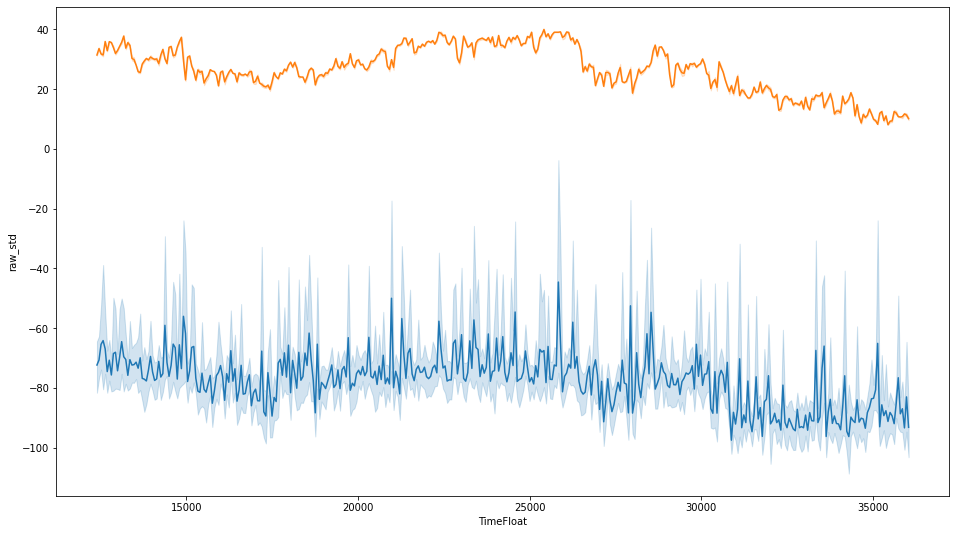

In [62]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=timefloat_datas['raw_std'], x=timefloat_datas['TimeFloat'])
sns.lineplot(y=timefloat_datas['at_10_0'], x=timefloat_datas['TimeFloat'])


In [132]:
WINDOW_SIZE = 30
train_set, test_set = timefloat_datas[:13000], timefloat_datas[13000:]

def make_dataset(data, label, window_size=WINDOW_SIZE):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i + window_size]))
        label_list.append(np.array(label.iloc[i + window_size]))
    return np.array(feature_list), np.array(label_list)

In [133]:
from sklearn.model_selection import train_test_split

feature_cols = ['raw_std']
label_cols = ['at_10_0']

train_feature = train_set[feature_cols]
train_label = train_set[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)
print(train_feature.shape, train_label.shape)
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape


(12980, 20, 1) (12980, 1)


((10384, 20, 1), (2596, 20, 1))

In [134]:
test_feature, test_label = test_set[feature_cols], test_set[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((1866, 20, 1), (1866, 1))

In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(units=20,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=20, 
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])


Epoch 1/200
520/520 [==============================] - 3s 4ms/step - loss: 491.3372 - val_loss: 81.8436

Epoch 00001: val_loss improved from inf to 81.84355, saving model to model\tmp_checkpoint.h5
Epoch 2/200
520/520 [==============================] - 1s 2ms/step - loss: 85.4787 - val_loss: 73.7138

Epoch 00002: val_loss improved from 81.84355 to 73.71381, saving model to model\tmp_checkpoint.h5
Epoch 3/200
520/520 [==============================] - 1s 2ms/step - loss: 71.3375 - val_loss: 60.6070

Epoch 00003: val_loss improved from 73.71381 to 60.60704, saving model to model\tmp_checkpoint.h5
Epoch 4/200
520/520 [==============================] - 1s 2ms/step - loss: 61.9776 - val_loss: 59.0955

Epoch 00004: val_loss improved from 60.60704 to 59.09550, saving model to model\tmp_checkpoint.h5
Epoch 5/200
520/520 [==============================] - 1s 2ms/step - loss: 59.3022 - val_loss: 52.9675

Epoch 00005: val_loss improved from 59.09550 to 52.96753, saving model to model\tmp_checkpoi

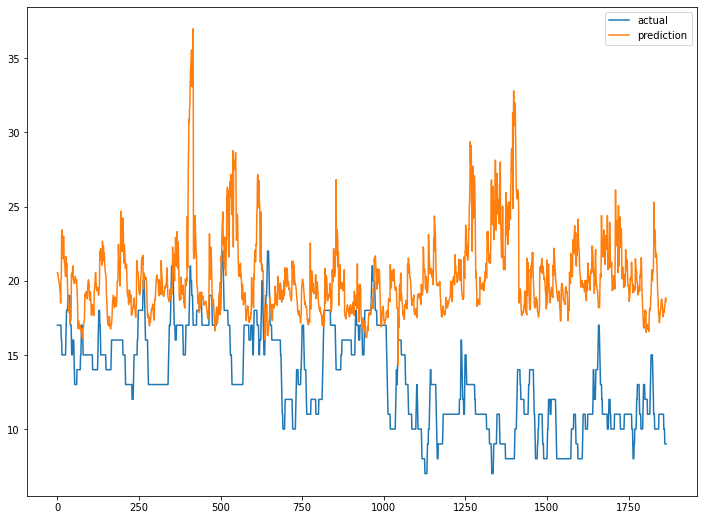

In [136]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape, test_label.shape

plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')

# sns.lineplot(y=valid_datas[0]['high_pm10_0_at'], x=valid_datas[0]['time'])
plt.legend()
plt.show()

In [137]:
scale_cols = ['time', 'raw_std', 'at_10_0']
# scaled_datas = MinMaxScaler().fit_transform(valid_datas[0][scale_cols])
# scaled_datas = pd.DataFrame(scaled_datas)
# scaled_datas.columns = scale_cols

show_datas = valid_datas[0][scale_cols]
# timefloat_datas = time_datas
# timefloat_datas['TimeFloat'] = (pd.DatetimeIndex(time_datas['time']).astype(np.int64) // 10 ** 9 - 50000) % 86400

# timefloat_datas = pd.DataFrame(timefloat_datas['TimeFloat'])

# timefloat_datas = pd.concat([timefloat_datas, valid_datas[0][scale_cols]], axis=1)
# timefloat_datas


In [138]:
pred[0][0]

20.540836

In [139]:
show_datas["predict"]=show_datas["raw_std"]
test_datas = show_datas
for i in range(len(pred)):
    test_datas.at[13020 + i, 'predict'] = pred[i][0]
test_datas

<ipython-input-139-7a2e96a853c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_datas["predict"]=show_datas["raw_std"]


,time,raw_std,at_10_0,predict
0,2021-05-03 17:20,-54,32,-54
1,2021-05-03 17:20,-75,32,-75
2,2021-05-03 17:20,-75,32,-75
3,2021-05-03 17:20,-92,32,-92
4,2021-05-03 17:20,-67,32,-67
...,...,...,...,...
14881,2021-05-03 23:54,-84,9,18
14882,2021-05-03 23:54,-101,9,18
14883,2021-05-03 23:54,-95,9,18
14884,2021-05-03 23:54,-91,9,18


<AxesSubplot:xlabel='time', ylabel='raw_std'>

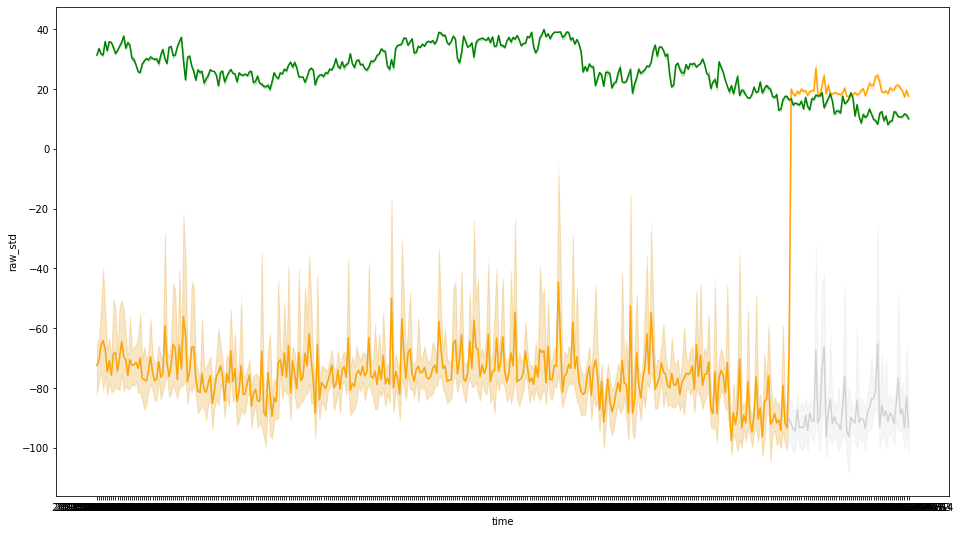

In [140]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=test_datas['raw_std'], x=test_datas['time'], color="lightgray")
sns.lineplot(y=test_datas['predict'], x=test_datas['time'], color="orange")
sns.lineplot(y=test_datas['at_10_0'], x=test_datas['time'], color="green")

<ipython-input-144-f217ae2756eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_datas["predict"] = new_datas["raw_std"]


<AxesSubplot:xlabel='time', ylabel='predict'>

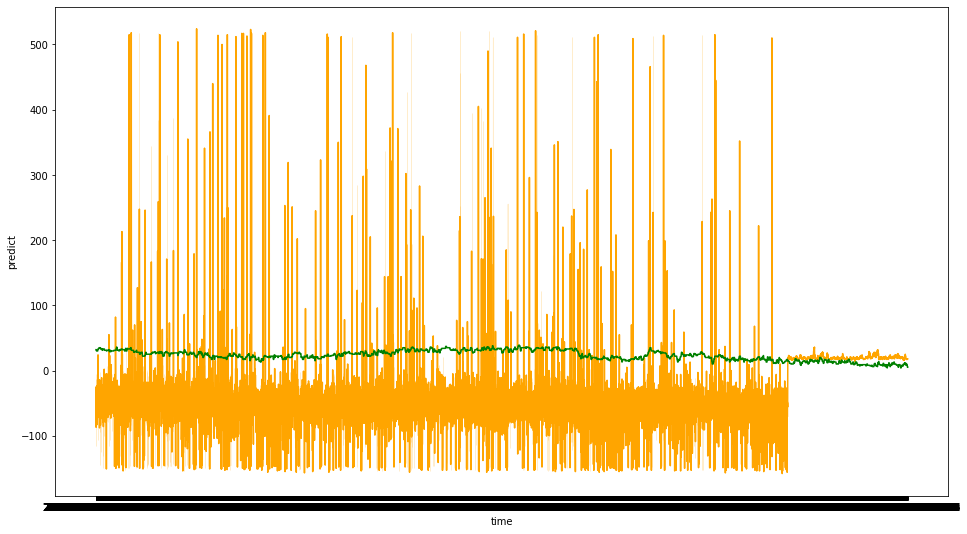

In [144]:
# new_cols = ['time', 'raw_std', 'at_10_0']
# new_datas = valid_datas[2][new_cols]

# new_datas["predict"] = new_datas["raw_std"]
# new_test_datas = new_datas
# for i in range(len(pred)):
#     new_test_datas.at[len(new_test_datas) - len(pred) + i, 'predict'] = pred[i][0]

# plt.figure(figsize=(16, 9))
# # sns.lineplot(y=new_test_datas['raw_std'], x=new_test_datas['time'], color="lightgray")
# sns.lineplot(y=new_test_datas['predict'], x=new_test_datas['time'], color="orange")
# sns.lineplot(y=new_test_datas['at_10_0'], x=new_test_datas['time'], color="green")